In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Exploratory Data Analysis

In this section, we will be exploring 3 predictor variables `gender`, `age` and `traffic` that are related to the 2 response variables `claims` and `cost` to find patterns or underlying relationships between the predictor and response variables. This is going to help us answer the initial question we posed in the subsequent sections.

<br/>

## Table of Contents 
>1. Classifying dataset into numerical and categorical <br>
>2. Exploring Predictor Variables <br>
>>2.1 `gender` (gender of individual) <br>
>>2.2 `age` (age category of individual) <br>
>>2.3 `traffic` (traffic index) <br>
>3. Exploring the Response Variables
>>3.1 `claims` (boolean variable indicating presence of an insurance claim) <br>
>>3.2 `cost` (cost of insurance claim when `claims` is present) <br>
>4. Exploring Relationship between predictor variables and `claims`
>>4.1 `gender` against `claims` <br>
>>4.2 `age` against `claims` <br>
>>4.3 `traffic` against `claims` <br>
>5. Exploring Relationship between predictor variables and `cost`
>>5.1 `gender` against `cost` <br>
>>5.2 `age` against `cost` <br>
>>5.3 `traffic` against `cost` <br>

<br/>

## 1. First, let us classify our predictor and response variables as numerical or categorical.

Numerical:

1. `age` (Predictor) <br>
2. `traffic`(Predictor) <br>
3. `cost` (Response)` <br>


Categorical:

1. `gender` (Predictor) <br>
2. `claims` (Response) <br>


We will be renaming some of the column names in the dataset to their respective variable names above in order to visually simplify our plots later on.

In [9]:
# Import csv file as DF
data = pd.read_csv("Vehicle_policies_2020.csv")


# Rename some of the variables' column names for simplicity 
data = data.rename(columns={'agecat':'age', 'traffic_index':'traffic','claimcst0':'cost'})


# Extract the predictor variables into a DF
gender = pd.DataFrame(data["gender"]) # Predictor
age = pd.DataFrame(data["age"]) # Predictor 
traffic = pd.DataFrame(data["traffic"])# Predictor


# Create a new column 'claims' inside the dataset 'data' that we will be using as our response variable
# Extract response variable 'claims' into a DF
data['claims'] = data['numclaims'] > 0 
data['claims'] = data['claims'].replace({True: 'Yes', False: 'No'})
claims = pd.DataFrame(data["claims"])  


# In order to extract the dataframe 'cost', we will need to extract the rows with a positive occurence of a claim 
# from the orginal dataset 'data' into a new dataframe 'data_with_claims', 
# and subsequently extract the relevant column from 'data_with_claims' as the 'cost' dataframe
data_with_claims = data[data['numclaims']>0]
cost = pd.DataFrame(data_with_claims["cost"])


# Display data
print("Data dimensions: ", data.shape)
print("Data types:")
print(data.dtypes)
data.head()



Data dimensions:  (60392, 16)
Data types:
pol_number          int64
pol_eff_dt         object
gender             object
age               float64
date_of_birth      object
credit_score      float64
area               object
traffic           float64
veh_age             int64
veh_body           object
veh_value         float64
claim_office       object
numclaims           int64
cost              float64
annual_premium    float64
claims             object
dtype: object


,pol_number,pol_eff_dt,gender,age,date_of_birth,credit_score,area,traffic,veh_age,veh_body,veh_value,claim_office,numclaims,cost,annual_premium,claims
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53,No
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53,No
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53,No
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53,No
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53,No


# 2. Exploring Predictor Variables

In [3]:
def plot(var):
    f, axes = plt.subplots(1, 3, figsize=(18, 9))
    sb.boxplot(data = var, orient = "h", ax = axes[0])
    sb.histplot(data = var, ax = axes[1])
    sb.violinplot(data = var, orient = "h", ax = axes[2])

## 2.1 Exploring predictor variable `gender`
`gender` is a categorical variable with 2 values: `Male` and `Female`

<AxesSubplot:xlabel='gender', ylabel='count'>

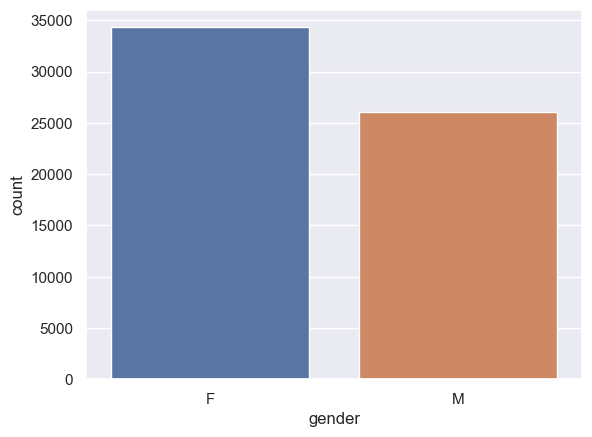

In [4]:
sb.countplot(x='gender', data=data)


## 2.1 Exploring predictor variable `age`
`age` is a categorical variable with 6 different age categories


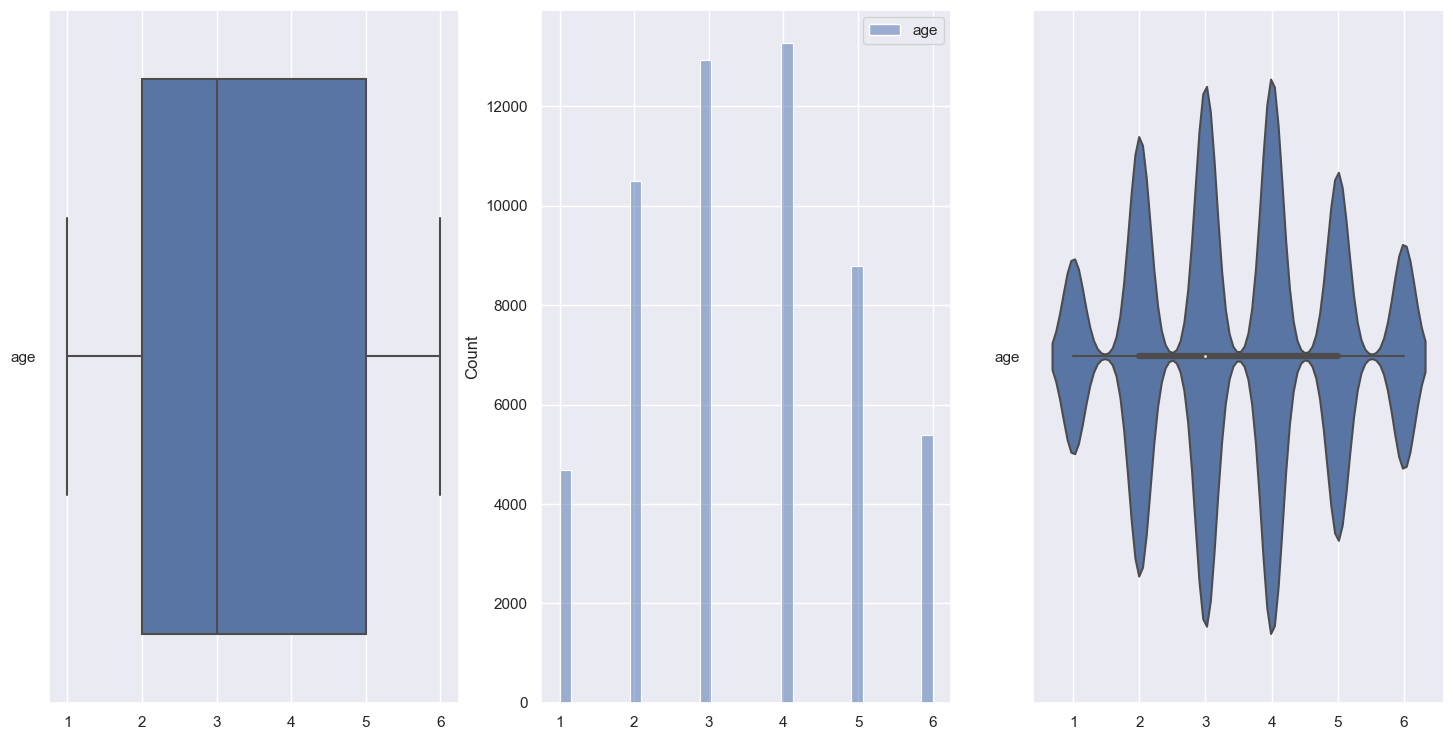

In [10]:
plot(age)

## 2.3 Exploring `traffic`
`traffic` is a numerical variable that represents the traffic index

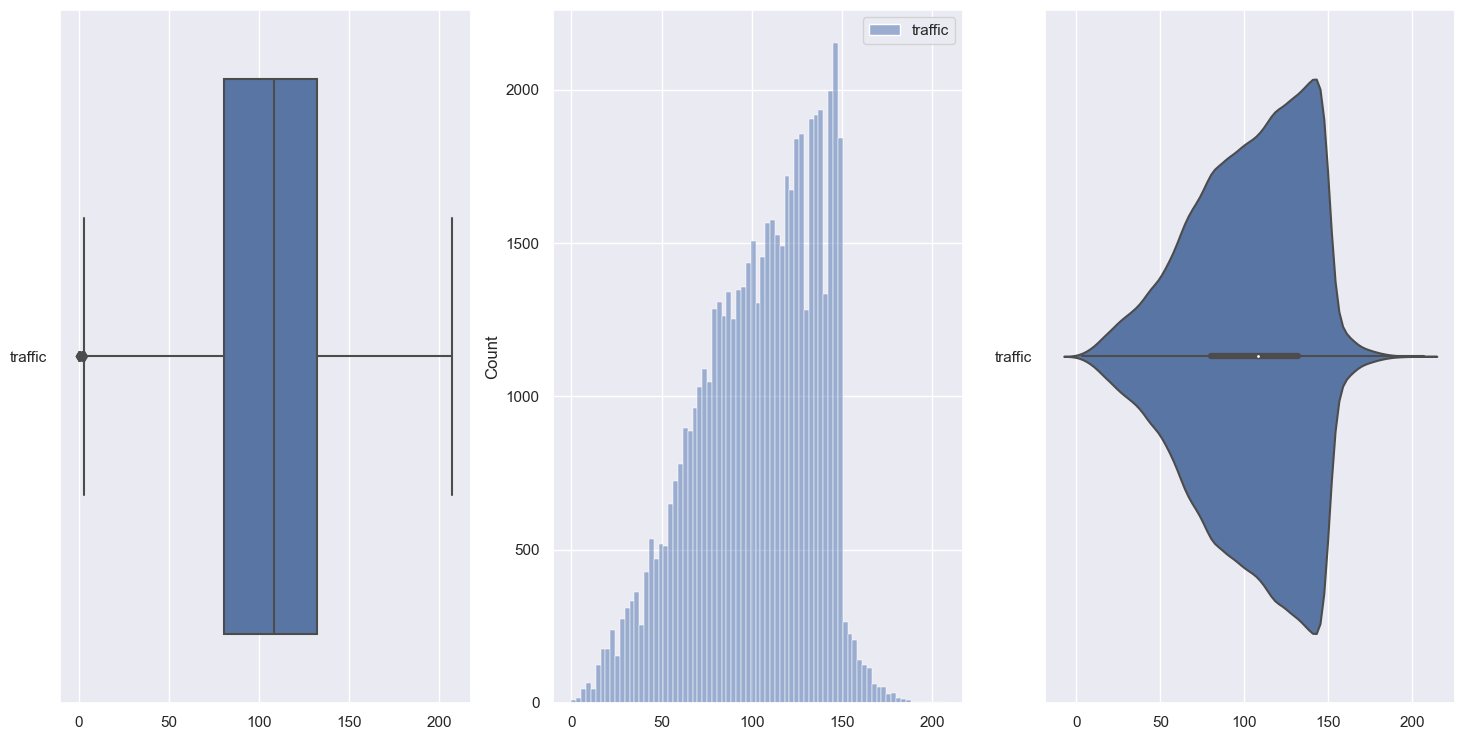

In [11]:
plot(traffic)

# 3. Exploring Response Variables

## 3.1 `claims` 
This represents the presence or lack thereof of an insurance claim in the dataset

<AxesSubplot:xlabel='claims', ylabel='count'>

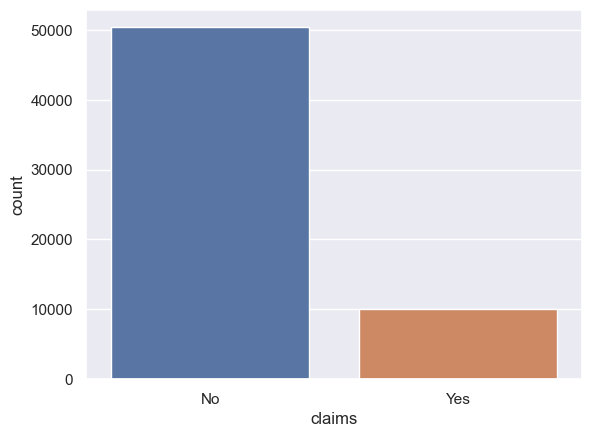

In [12]:
sb.countplot(x='claims', data=claims)

## 3.2 `cost`
This represents the cost of each insurance claim when present

<AxesSubplot:>

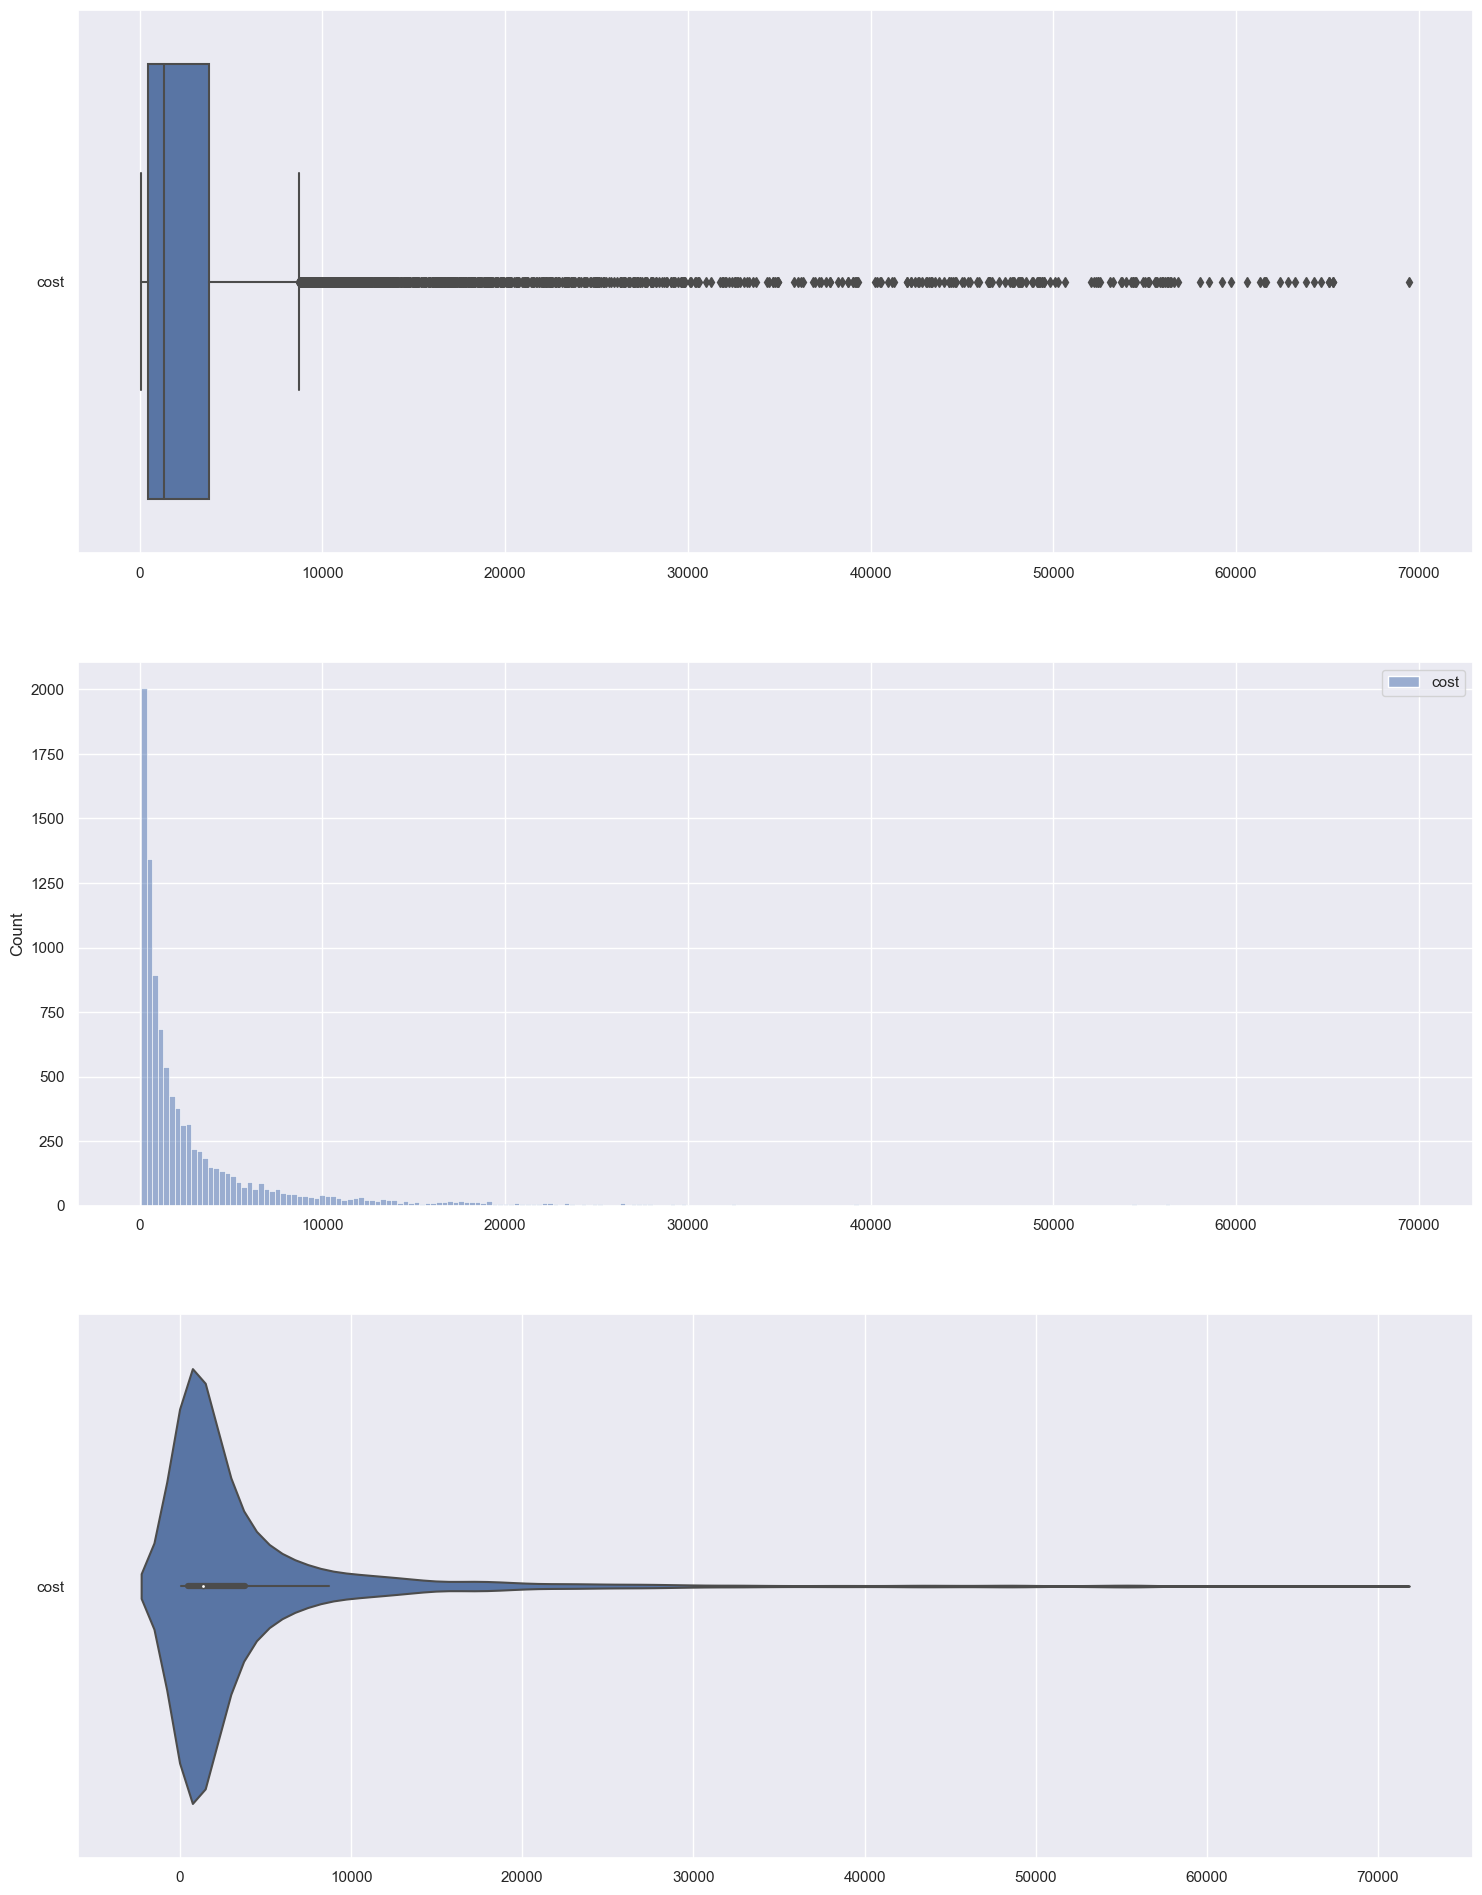

In [37]:
cost.describe()

f, axes = plt.subplots(3, 1, figsize=(18, 24))
sb.boxplot(data = cost, orient = "h", ax = axes[0])
sb.histplot(data = cost, ax = axes[1])
sb.violinplot(data = cost, orient = "h", ax = axes[2])


# 4. Explore the relationship between `predictor variables` and `response variables`

## 4.1 Explore the relationship between `gender` and `claims` 

Plot `gender` against `claims` to visualize their mutual relationship.

<AxesSubplot:xlabel='claims', ylabel='count'>

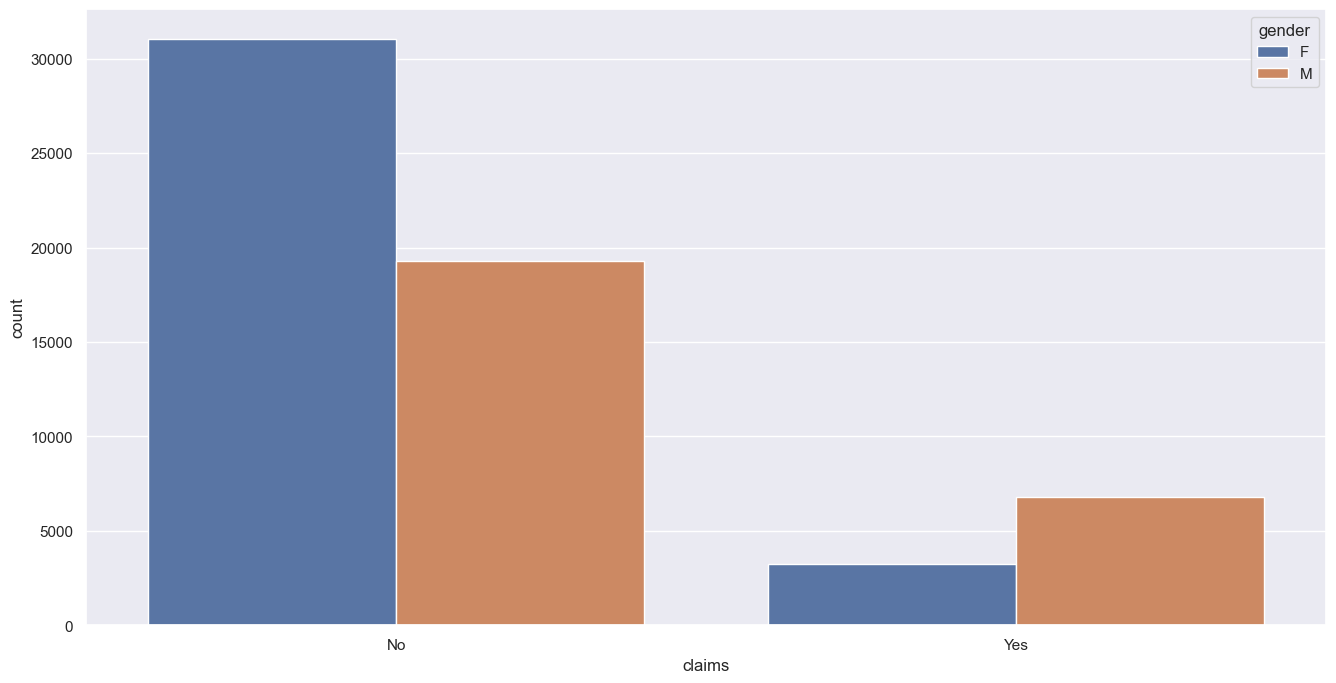

In [15]:
f = plt.figure(figsize=(16, 8))
sb.countplot(hue = 'gender', x = 'claims', data = data)


## 4.1 Explore the relationship between `age` and `claims`
Plot `age` against `claims` to visualize their mutual relationship.

<AxesSubplot:xlabel='claims', ylabel='count'>

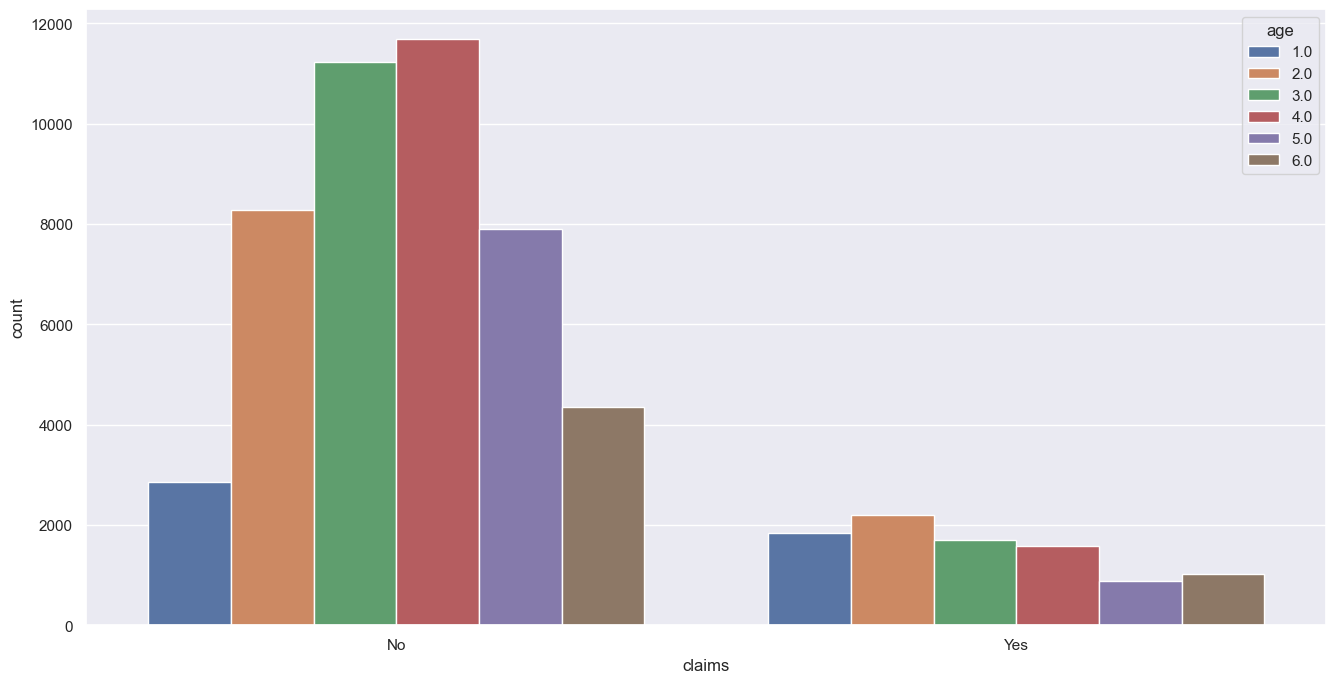

In [17]:
f = plt.figure(figsize = (16,8))
sb.countplot(x = 'claims', hue = 'age', data=data)

## 4.1 Explore the relationship between `traffic` and `claims` using classification
Plot `claims` against `traffic` to visualize their mutual relationship.


<AxesSubplot:xlabel='traffic', ylabel='claims'>

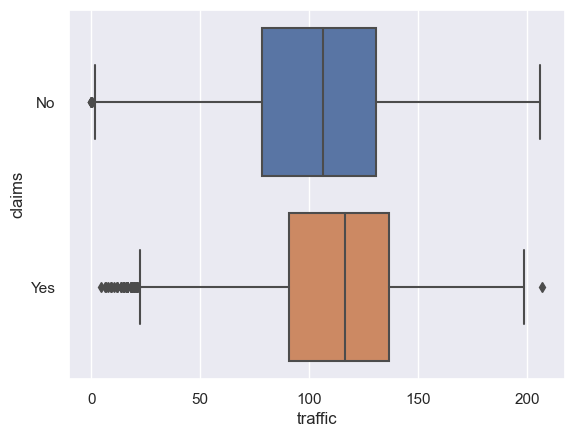

In [19]:
sb.boxplot(data=data, y='claims', x='traffic')

# 5. Exploring the relationship between `predictor variables` and `cost` 

## 5.1 Exploring the relationship between `gender` and `cost`
Plot `gender` against `cost` to visualize their mutual relationship.

<AxesSubplot:xlabel='cost', ylabel='gender'>

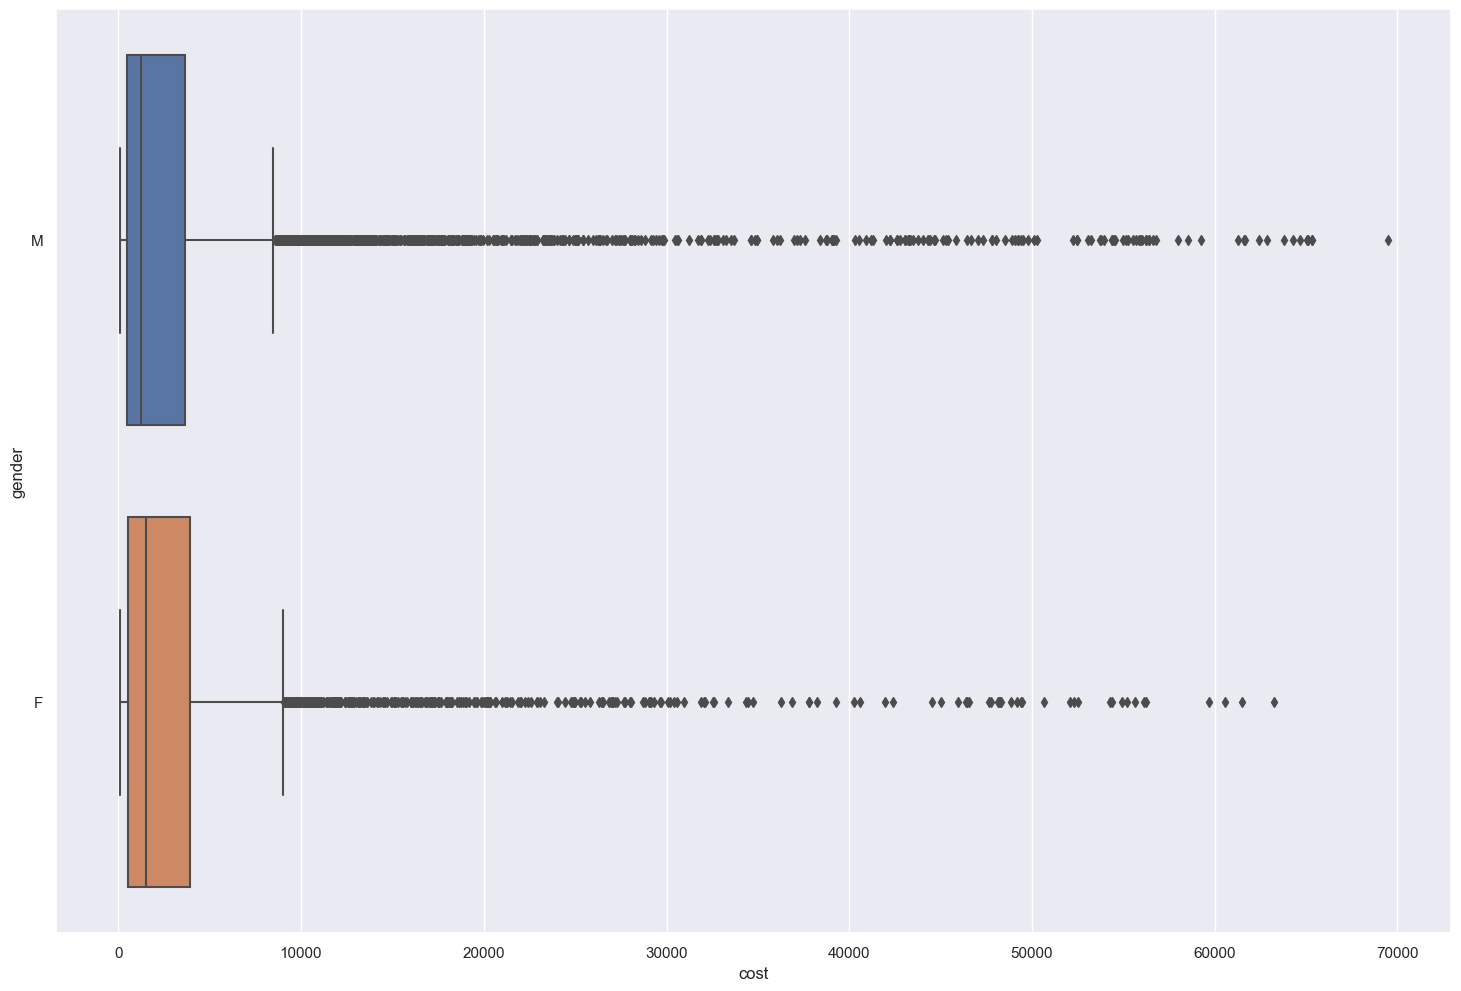

In [22]:
f = plt.figure(figsize=(18,12))
sb.boxplot(data=data_with_claims, y='gender', x='cost')

## 5.2 Exploring the relationship between `age` against `cost`
Plot `cost` against `age` to visualize their mutual relationship.

<Figure size 1000x2000 with 0 Axes>

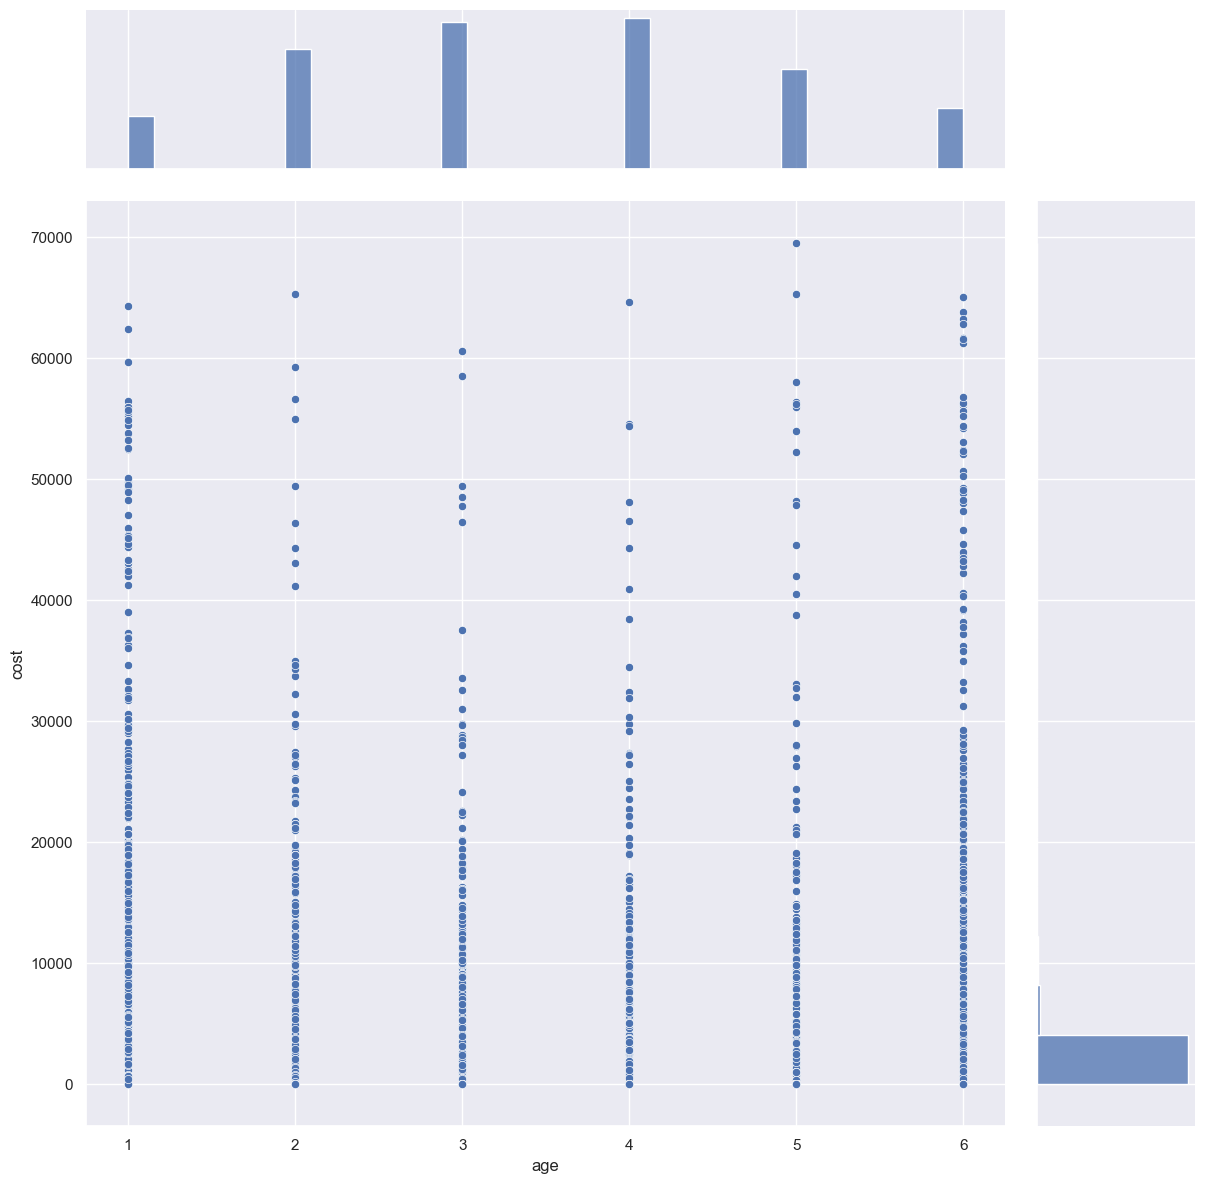

In [32]:
f = plt.figure(figsize=(10,20))
sb.jointplot(x = "age", y = "cost", data = data, height = 12)

## 5.3 Exploring the relationship between traffic and cost
Plot `cost` against `traffic` to visualize their mutual relationship.

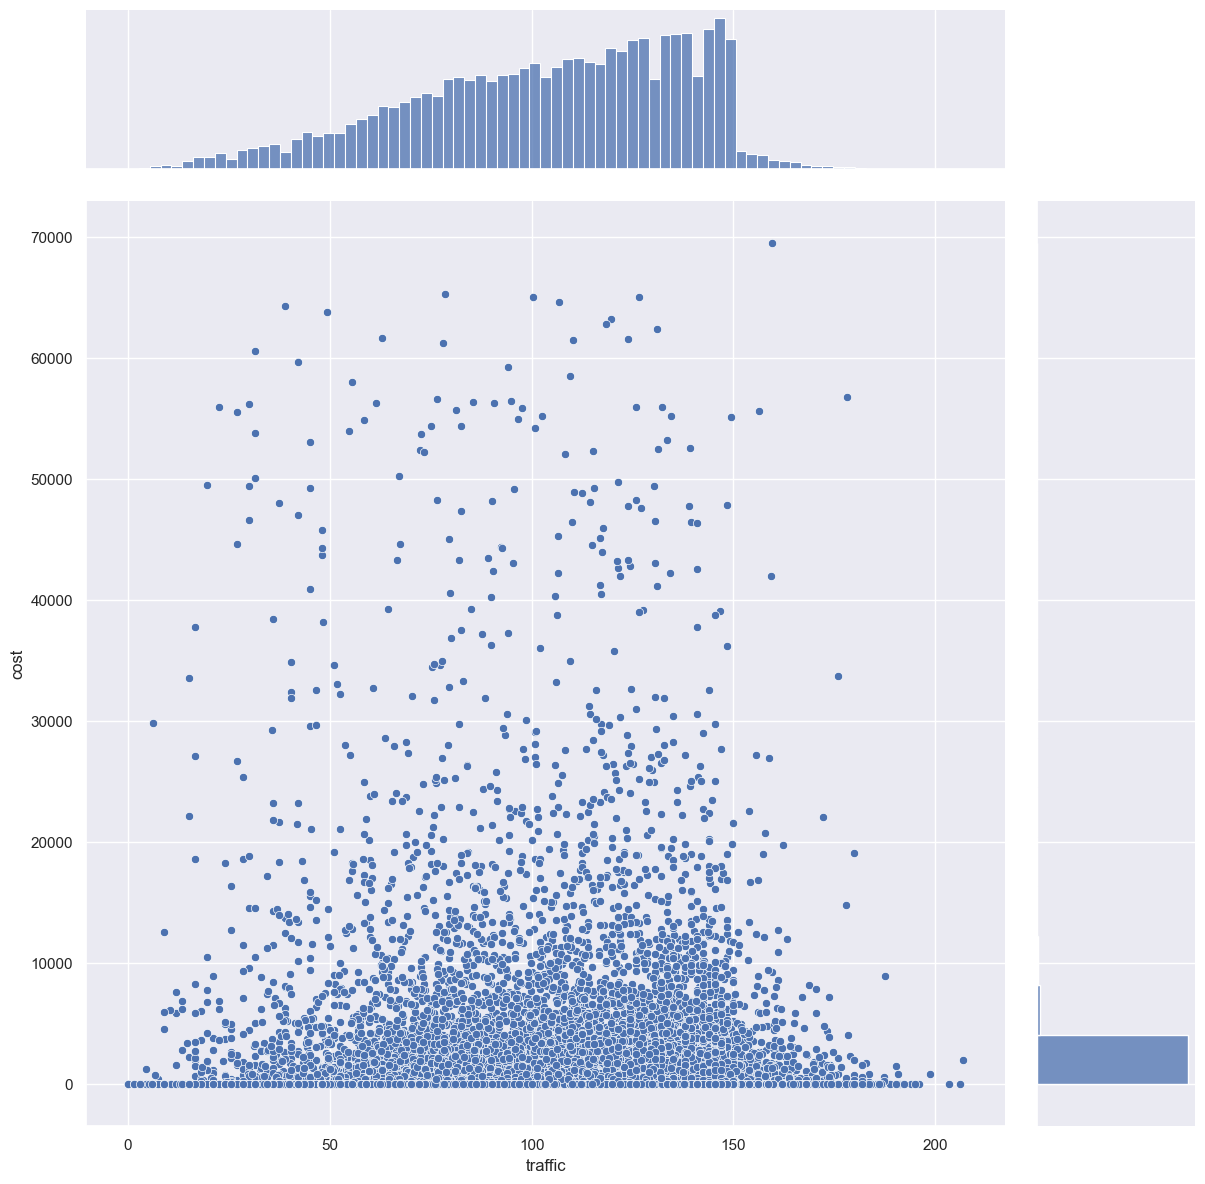

In [30]:
sb.jointplot(x = "traffic", y = "cost", data = data, height = 12)